<a href="https://colab.research.google.com/github/neliudochka/WeightsHeights/blob/main/1lab_LiniearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML lab 1  
# Linear regression  
  
## Preparatory stage:
**1. Select a dataset and analyze it.**  
I chose [Heights and Weights Dataset](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset/data).  
It contains two columns: height and weight. So the model should be able to predict the height from the given weight.  



In [11]:
#import module for data analysis
import pandas as pd
url = 'https://raw.githubusercontent.com/neliudochka/WeightsHeights/main/WeightHeight.csv'
data = pd.read_csv(url)
data.head(2)




Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

**2. Determine input and output:**  
Input: weight  
Output: height  

**3.  Visualize the dependencies between inputs and outputs**


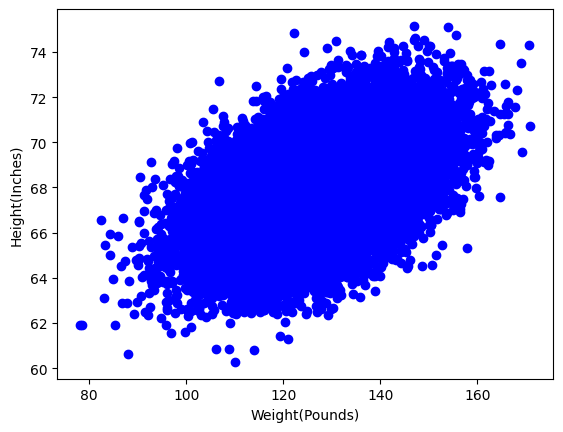

In [25]:
#module for visualization

import matplotlib.pyplot as plt

w = 'Weight(Pounds)'
h = 'Height(Inches)'

plt.plot(data[w], data[h], 'bo')
plt.xlabel(w)
plt.ylabel(h)
plt.show()


**4. Detect anomalies, incomplete samples in the data, etc**

**5. To conduct correlational input of analyzes and outputs of the data set, to identify interdependent factors.**

**6. Prepare data for further use.**

**7. Divide the selected and filtered data set into training and test data sets part (70% for training, 30% for the test).**


In [26]:
from sklearn.model_selection import train_test_split

wTrain, wTest, hTrain, hTest = train_test_split(data[w], data[h], test_size=0.3, random_state=1)